In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd

In [2]:
fsc = pd.read_csv("fandango_score_comparison.csv")
mr = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
fsc.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
mr.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
fandangoDF = pd.DataFrame(data=fsc, columns=["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"])

In [6]:
fandangoDF.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
fandangoDF[["film", "year"]] = fandangoDF.FILM.str.extract(r"(.*?)\((\d*)\)", expand=True)
fandangoDF = fandangoDF.drop(["FILM"], axis=1)
fandangoDF.year = fandangoDF.year.astype(int)

In [8]:
fandangoDF.head()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,film,year
0,5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,5.0,4.5,12640,0.5,Cinderella,2015
2,5.0,4.5,12055,0.5,Ant-Man,2015
3,5.0,4.5,1793,0.5,Do You Believe?,2015
4,3.5,3.0,1021,0.5,Hot Tub Time Machine 2,2015


In [9]:
mrDF = pd.DataFrame(data=mr, columns=["movie", "year", "fandango"])

In [10]:
mrDF.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [11]:
fandangoDF.Fandango_votes.describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

In [12]:
fandangoDF.Fandango_Ratingvalue.describe()

count    146.000000
mean       3.845205
std        0.502831
min        2.700000
25%        3.500000
50%        3.900000
75%        4.200000
max        4.800000
Name: Fandango_Ratingvalue, dtype: float64

In [13]:
fandangoDF.year.value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [14]:
mrDF.fandango.describe()

count    214.000000
mean       3.894860
std        0.516781
min        2.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: fandango, dtype: float64

In [15]:
mrDF.year.value_counts()

2016    191
2017     23
Name: year, dtype: int64

Check if data contain popular movies

In [16]:
len(fandangoDF[fandangoDF.Fandango_votes < 30])

0

In [17]:
fand2015 = fandangoDF[fandangoDF.year == 2015]

In [18]:
fand2016 = mrDF[mrDF.year == 2016]

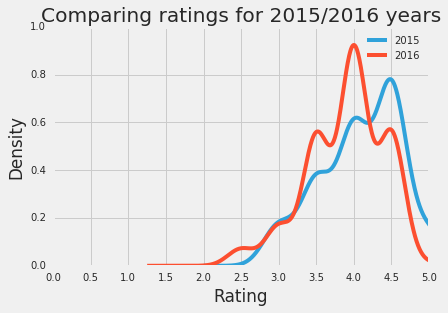

In [49]:
plt.style.use("fivethirtyeight")
fand2015.Fandango_Stars.plot.kde(label="2015", legend=True)
fand2016.fandango.plot.kde(label="2016", legend=True)
plt.title("Comparing ratings for 2015/2016 years")
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, .5))
plt.xlabel("Rating")
plt.show()

In [54]:
mean2015 = fand2015.Fandango_Stars.mean()
median2015 = fand2015.Fandango_Stars.median()
mode2015= float(fand2015.Fandango_Stars.mode())
mean2016 = fand2016.fandango.mean()
median2016 = fand2016.fandango.median()
mode2016 = float(fand2016.fandango.mode())

In [56]:
mmm = pd.DataFrame({"2015": [mean2015, median2015, mode2015],
                    "2016": [mean2016, median2016, mode2016]}, index=["Mean", "Median", "Mode"])
mmm

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


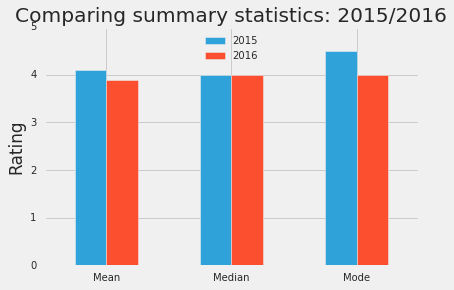

In [68]:
mmm.plot.bar(title="Comparing summary statistics: 2015/2016")
plt.ylabel("Rating")
plt.xticks(rotation=0)
plt.ylim(0, 5)
plt.legend(loc="upper center")
plt.show()